In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1) Which countries are F1 constructors from?

In [2]:
constructors = pd.read_csv('constructors.csv', dtype = {'nationality': str})
constructors.head()

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,NaN
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1,NaN
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,NaN


In [3]:
#find the number of unique nationalities represented
len(constructors.groupby('nationality').count()['constructorRef'])

24

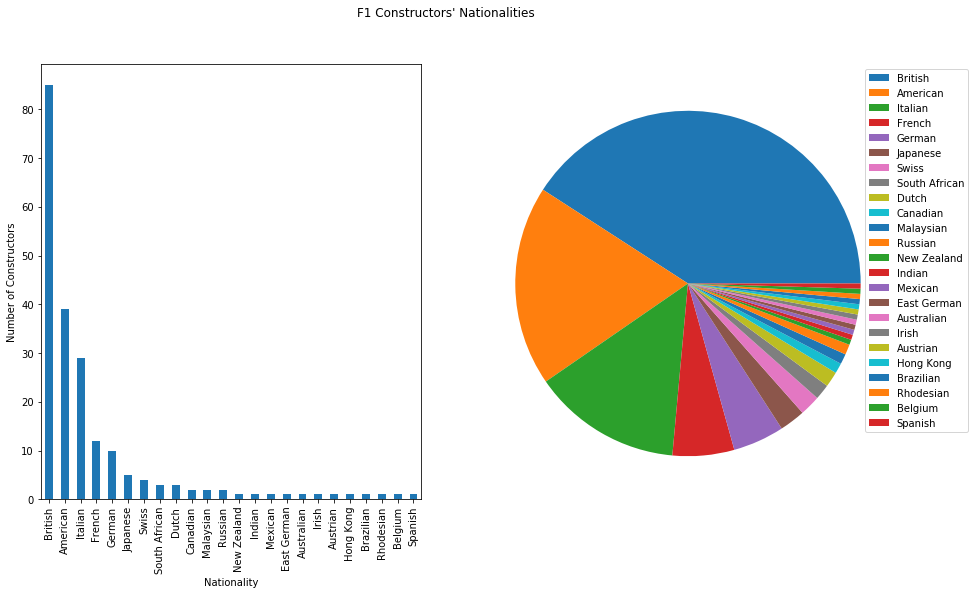

In [4]:
#set dataframe
countries = pd.DataFrame(constructors.nationality.value_counts(), columns = ['nationality'])

#chart results
plt.figure(figsize = (15,8))
plt.suptitle('F1 Constructors\' Nationalities')

plt.subplot(1,2,1)
constructors.nationality.value_counts().head(24).plot(kind = 'bar')
plt.xlabel('Nationality')
plt.ylabel('Number of Constructors')

plt.subplot(1,2,2)
plt.pie(countries)
plt.axis('equal')
plt.legend(countries.index, bbox_to_anchor = (1.25, 1), loc = 'upper right')
plt.show()

We can see that the vast majority of Formula 1 teams throughout history have called the United Kingdom home. The USA, Italy, France, and Germany are also popular countries to set up shop. We can see from the constructor's data that 208 separate constructors have at one time participated in the F1 World Championship, but most were short lived and are now defunct. Let's see which teams have participated in the most races.

### 2) Which F1 constructors have participated in the most races?

In [5]:
results = pd.read_csv('results.csv')
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


In [6]:
active_cons_25 = pd.DataFrame(results.constructorId.value_counts())
active_cons_25.rename(columns = {'constructorId':'numRaces'}, inplace = True)
active_cons_25.head()

,numRaces
6,2140
1,1625
3,1379
25,881
32,871


In [7]:
join_cons_res = constructors.set_index('constructorId').join(active_cons_25, lsuffix = 'cons', rsuffix = 'res')
join_cons_res = join_cons_res.sort_values('numRaces', ascending = False)
join_cons_res.head()

,constructorRef,name,nationality,url,Unnamed: 5,numRaces
constructorId,,,,,,
6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,NaN,2140.0
1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN,1625.0
3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN,1379.0
25,tyrrell,Tyrrell,British,http://en.wikipedia.org/wiki/Tyrrell_Racing,NaN,881.0
32,team_lotus,Team Lotus,British,http://en.wikipedia.org/wiki/Team_Lotus,NaN,871.0


In [38]:
join_cons_res_25 = join_cons_res.head(25)
join_cons_res_25.head()

,constructorRef,name,nationality,url,Unnamed: 5,numRaces
constructorId,,,,,,
6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,NaN,2140.0
1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN,1625.0
3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN,1379.0
25,tyrrell,Tyrrell,British,http://en.wikipedia.org/wiki/Tyrrell_Racing,NaN,881.0
32,team_lotus,Team Lotus,British,http://en.wikipedia.org/wiki/Team_Lotus,NaN,871.0


In [9]:
#join_cons_res_25.plot.bar(x='name', legend = False, color = 'blue')

In [10]:
#join_melt = join_cons_res_25.melt()
#join_melt

In [11]:
#plt.bar(x=join_melt['name'],y=join_melt['numRaces'], color='blue', legend='false')

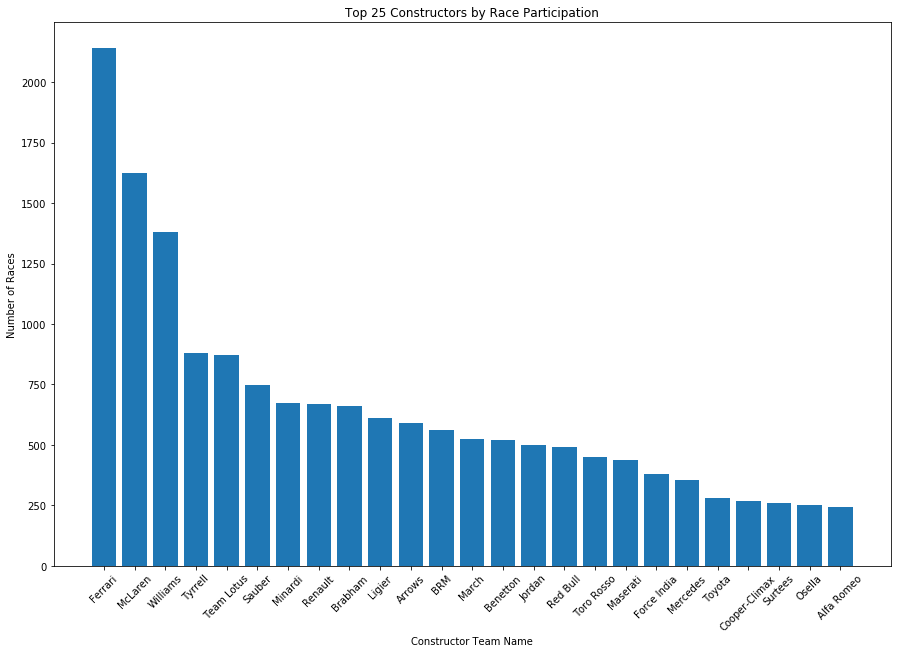

In [12]:
x_races = join_cons_res_25['name']
y_races = join_cons_res_25['numRaces']

plt.figure(figsize = (15,10))
plt.bar(range(len(x_races)), y_races)
plt.xticks(range(len(x_races)), join_cons_res_25['name'], rotation = 45)
plt.ylabel('Number of Races')
plt.xlabel('Constructor Team Name')
plt.title('Top 25 Constructors by Race Participation')

### 3) How do these race totals compare to the constructors' win totals?

In [13]:
cons_wins = results.loc[lambda df: results['positionOrder'] == 1, :]
cons_wins = pd.DataFrame(cons_wins.constructorId.value_counts())
cons_wins.rename(columns = {'constructorId':'numWins'}, inplace = True)
cons_wins.head()

,numWins
6,230
1,178
3,114
131,76
9,55


In [14]:
join_cons_wins = join_cons_res.join(cons_wins)
join_cons_wins_25 = join_cons_wins.head(25)
join_cons_wins_25.head()

,constructorRef,name,nationality,url,Unnamed: 5,numRaces,numWins
constructorId,,,,,,,
6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,NaN,2140.0,230.0
1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN,1625.0,178.0
3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN,1379.0,114.0
25,tyrrell,Tyrrell,British,http://en.wikipedia.org/wiki/Tyrrell_Racing,NaN,881.0,23.0
32,team_lotus,Team Lotus,British,http://en.wikipedia.org/wiki/Team_Lotus,NaN,871.0,45.0


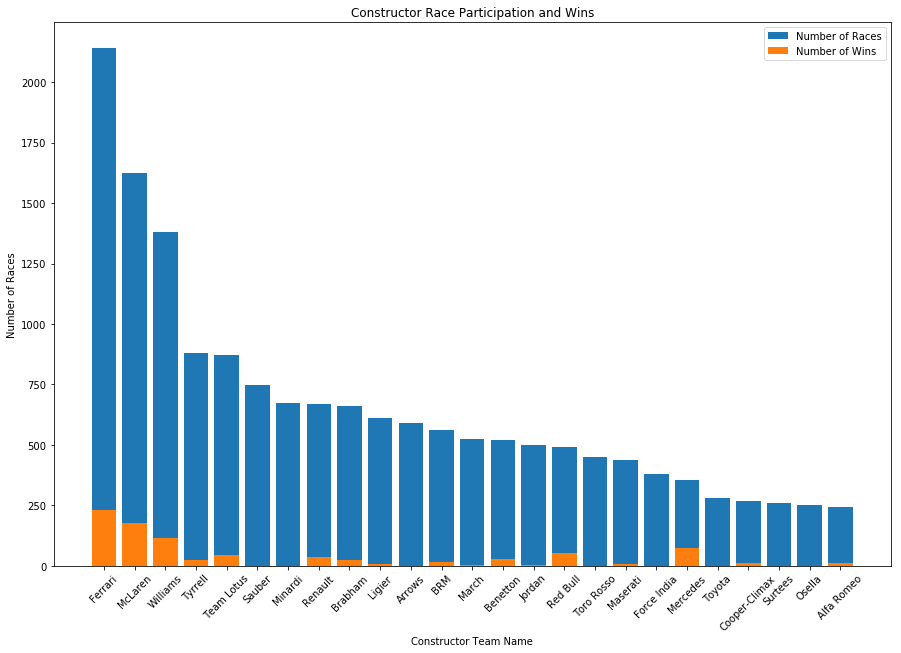

In [31]:
x_wins = join_cons_wins_25['name']
y_wins = join_cons_wins_25['numWins']

plt.figure(figsize = (15,10))
plt.xticks(range(len(x_wins)), join_cons_wins_25['name'], rotation = 45)
plt_races = plt.bar(range(len(x_races)), y_races)
plt_wins = plt.bar(range(len(x_wins)), y_wins)
plt.legend((plt_races[0], plt_wins[0]), ('Number of Races', 'Number of Wins'), loc = "upper right")
plt.xlabel('Constructor Team Name')
plt.ylabel('Number of Races')
plt.title('Constructor Race Participation and Wins')

### 4) Let's compare aggregate race wins to the proportion of races won

In [105]:
win_pct = pd.DataFrame((join_cons_wins_25['numWins'] / join_cons_wins_25['numRaces']) * 100)
#win_pct.rename(colums = {'0':'Win Percentage'}, inplace = True)
#cons_wins.rename(columns = {'constructorId':'numWins'}, inplace = True)

win_pct = join_cons_wins_25.join(win_pct)
win_pct.rename(columns = {0: 'winPercentage'}, inplace = True) #change the variable column name
win_pct = win_pct.dropna(subset = ['winPercentage']) #drop teams that haven't won
win_pct = win_pct.round(decimals = 2) #round columns
win_pct = win_pct.sort_values('winPercentage', ascending = False)
win_pct

,constructorRef,name,nationality,url,Unnamed: 5,numRaces,numWins,winPercentage
constructorId,,,,,,,,
131,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,NaN,354.0,76.0,21.47
9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,NaN,490.0,55.0,11.22
1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN,1625.0,178.0,10.95
6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,NaN,2140.0,230.0,10.75
3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN,1379.0,114.0,8.27
4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1,NaN,669.0,35.0,5.23
22,benetton,Benetton,Italian,http://en.wikipedia.org/wiki/Benetton_Formula,NaN,520.0,27.0,5.19
32,team_lotus,Team Lotus,British,http://en.wikipedia.org/wiki/Team_Lotus,NaN,871.0,45.0,5.17
51,alfa,Alfa Romeo,Italian,http://en.wikipedia.org/wiki/Alfa_Romeo_(Formu...,NaN,244.0,11.0,4.51


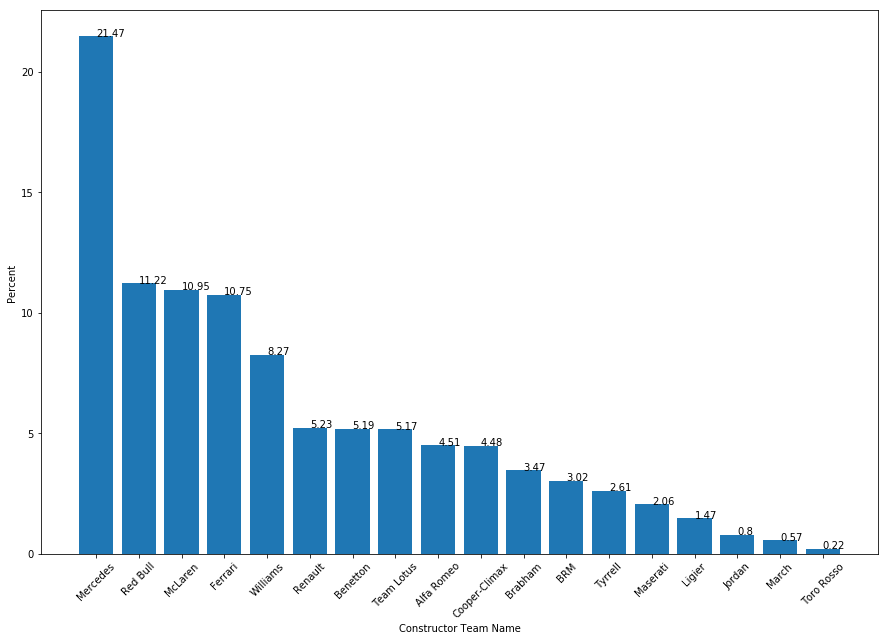

In [106]:
x_win_pct = win_pct['name']
y_win_pct = win_pct['winPercentage']

#win_pct_values = [] #initiate an empty list to put values into

#for value in win_pct['winPercentage']: #loop to populate list
#    win_pct_values.append(value)

plt.figure(figsize = (15,10))
plt.bar(range(len(x_win_pct)), y_win_pct)
for a,b in zip(range(len(x_win_pct)), y_win_pct):
    plt.text(a,b,str(b))

plt.xticks(range(len(x_win_pct)), win_pct['name'], rotation = 45)
plt.xlabel('Constructor Team Name')
plt.ylabel('Percent')

plt.show()